<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week7%20-%20Regression/Exercise1_regression_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise1: Supervised Learning, Linear Regression

This exercise is an application of what you learn during the walkthrough. The following cell gather the different modules you need for this exercise (take a look specially for the sklearn library).

Some exercises consist of filling a part of the code without writing the whole code. Replace the `"YOUR CODE HERE"` by your own code.

In [0]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import collections  as mc
import pandas as pd 
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Sklearn import
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.linear_model import LinearRegression # Regression linear model
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.metrics import mean_squared_error, mean_absolute_error # Metrics for errors
from sklearn.model_selection import KFold # Cross validation



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Load the data
We are going to use an advertisement data. The task is to figure out how different means of advertisement influence the amount of sales of a product.
    
**Question 1:**  
Load the pandas dataset from the given URL. Then plot the first 5 rows. How many observations  and columns we have? Hint: use the `shape` attribute.

In [0]:
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Advertising.csv'
# Load the data
ad_df = pd.read_csv(url)
display(ad_df.head())

# Observations and columns (dimensions)
print("Number of observations", ad_df.shape[0])
print("Number of dimensions", ad_df.shape[1])


,id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Number of observations 200
Number of dimensions 5


In what follows we will try a simple linear regression using only one feature (univariate regression), that is, we want to predict the `sales` using only the `TV` advertisments.

## 2. Using Sklearn
When using sklearn we don't need to add a column of ones to the data in order to have the constant parameter. sklearn takes care of it, you should just pass the `fit_intercept` argument to be True (which is also the default value for this argument)

**Question 2:**  
1) From the advertising dataset, save the feature ``TV`` and the target `sales` in two different variables X and y respectively, in a dataframe pandas format and not as a serie (`X[['sth']]` instead of `X['sth']`).  
2) Create a new Linear model from the `LinearRegression` module of sklearn. Fit the model with the corresponding data.  
3) Print the values of the slope (use : `model.coef_` parameter), the constant (use: `model.intercept_` parameter)  and the score of the model (use: `model.score(X, y)`).  
4) Predict the sales using the fifth TV value of X (hint: `iloc[[5]]`) with your model (i.e `.predict()`) and compare with the true value from y.

In [0]:
# 1) Use the original dataframe
X = ad_df[["TV"]]
y = ad_df[["Sales"]]

In [0]:
# 2) Create the linear model
LR = LinearRegression(fit_intercept=True)

# Fit the model using X and y
LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# 3) 
print("Slope: %.4f" % LR.coef_.flatten()[0])
print("Constant (intercept): %.4f" % LR.intercept_[0])
print("R^2 score: %.4f" % LR.score(X, y))

Slope: 0.0475
Constant (intercept): 7.0326
R^2 score: 0.6119


In [0]:
#predict the Sales 
print("y_pred: %.4f" % LR.predict(X.iloc[[5]]).flatten()[0],  "y_true: ", y.iloc[5].Sales)

y_pred: 7.4462 y_true:  7.2


## 3.Using more features for prediction
Let's try to use more features to predict the sales. For example we can observe the effect of TV and Radio advertisment in the same time.

**Question 4:**  
1) From the advertising dataset, save the features ``TV`` and `Radio` in to X  and the target `sales` into y, in a dataframe pandas format (`X[['sth']]` instead of `X['sth']`).  
2) Create a new Linear model from the `LinearRegression` module of sklearn. Fit the model with the corresponding data.  
3)Print the values of the slope , the constant (intercept)  ans the score of the model (i.e `.score(X, y)`).  
4) the sales using the fifth TV and Radio values of X (hint: `iloc[[5]]`) with your model (i.e `.predict()`) and compare with the true value from y.  
5) Do the step 1-4 with 3 variables in X (you can choose `Newspaper`).  



In [0]:
# 1) Use the original dataframe
X = ad_df[["TV", "Radio"]]
y = ad_df[["Sales"]]

In [0]:
# 2) Create new linear model
LR = LinearRegression(fit_intercept=True)
# Fit the model with X and y
LR.fit(X, y)

# 3) 
print("Parmaeters: ", LR.coef_)
print("Intercept: ", LR.intercept_)
print("R^2 score: ", LR.score(X, y))

Parmaeters:  [[0.04575482 0.18799423]]
Intercept:  [2.92109991]
R^2 score:  0.8971942610828956


In [0]:
# 4) Predict 
print("y_pred: %.4f" % LR.predict(X.iloc[[5]]).flatten()[0],  "y_true: ", y.iloc[5].Sales)

y_pred: 12.5121 y_true:  7.2


In [0]:
# 5) with 3 features
X = ad_df[["TV", "Radio", "Newspaper"]]
y = ad_df[["Sales"]]
LR = LinearRegression(fit_intercept=True)
LR.fit(X, y)

print("params: ", LR.coef_)
print("constant: ", LR.intercept_)
print("R^2 score: ", LR.score(X, y))
print("y_pred: %.4f" % LR.predict(X.iloc[[5]]).flatten()[0],  "y_true: ", y.iloc[5].Sales)

params:  [[ 0.04576465  0.18853002 -0.00103749]]
constant:  [2.93888937]
R^2 score:  0.8972106381789521
y_pred: 12.4783 y_true:  7.2


## 4.Train/Test split and overfitting


We can keep the test data out of the training and try to predict the sales for the unseen data in the test set. We can also calculate the **MAE** for training and test data. 

To reduce the variance and enhance the model we will fisrt normalize the data. Then we will compare 3 different models: for 1 , 2 and 3 features. To compare the prediction behaviour regarding the number of features, it is possible to compute the MAE for each and plot the result (number of features vs error).

Here and example of how to use the MAE metric from sklearn:

```python
mean_absolute_error(y_train, LR.predict(X_train))
```


**Question 5:**  
1) Normalize the data using `MinMaxScaler`sklearn module over the original date (example on the walktrough). Note that the scaler returns a numpy array. We add line to transform it back to a pandas dataframe.  
2) From the advertising dataset, save the features ``TV``, `Radio` and `Newspaper` into X  and the target `Sales` into y, in a dataframe pandas format (`X[['sth']]` instead of `X['sth']`).  
3) For 1, 2 and 3 variables features of you data:
- split the data into two sets(training and testing using `train_test_split()`  
- create a linear model  
- fit the linear model with `X_train` and `y_train`

4) Compute the mean absolute error of the training set and the testing set, save the values into the two arrays already define. Plot the diffents errors values depending on the number of features. 





In [0]:
# 1) Normalize the data
# Create new scaler from MinMaxScaler()
scaler = MinMaxScaler()
# Fit and transform the original data
data = scaler.fit_transform(ad_df)
# Transform the scales data array to a dataframe
data = pd.DataFrame(data, columns=ad_df.columns).drop('id', axis=1)

In [0]:
# Save 3 features in X: TV, Newspaper and Radio
# Save the target in y: Sales
X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]


Train error:  [0.1386328698697667, 0.04720902430952486, 0.047618504464523294]
Test error :  [0.15254176754970591, 0.06939395556936792, 0.07070458300078353]


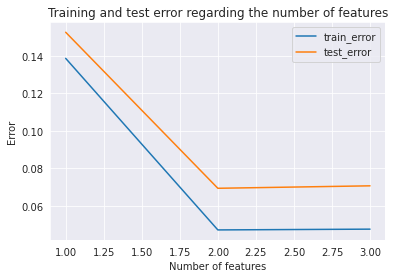

In [0]:
# Arrays to save the different errors
train_err = []
test_err = []

# 3) Iterate over 1, 2 and 3 features
for nbr_col in range(1, 4):
    # Select the good number of features for X
    X_temp = X[X.columns[:nbr_col]]
    # Split the dat set
    X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=10)
    # Create the linear model
    LR = LinearRegression(fit_intercept=False)
    # Fit the linear model
    LR.fit(X_train, y_train)
    
    #4) Compute and save the mean absolute error fro training and testing set
    train_err.append(mean_absolute_error(y_train, LR.predict(X_train)))
    test_err.append(mean_absolute_error(y_test, LR.predict(X_test)))

# Print the train and the test errors
print("Train error: ", train_err)
print("Test error : ", test_err)

# 4) diffents errors values depending on the number of features. 
plt.title("Training and test error regarding the number of features")
plt.plot(range(1,4), train_err, label="train_error")
plt.plot(range(1,4), test_err, label="test_error")
plt.legend(fontsize=10)
plt.xlabel("Number of features")
plt.ylabel("Error")
plt.show()


**Note:** Adding the last feature do not give us specially a better result.

## 5.Cross validation

The standard way to do a hyperparameter tuning is through cross validation. We need to make sure that our model has a has a good generalisation power and performs well on unseen data. We use the `KFold` sklearn module to separate the data set into different combination of data. It will reduce the overfitting issue When you create a new KFold object, you have to precise the number of splits you want.

We will first normalize the data to reduce the variance.

**Question 5:**  
1) Normalize the original dataframe. Then select the features : TV, Radio and Newspaper as matrix X. Y is the sales target output.  
2) Initialise the `KFold` sklearn module with 5 splits.  
3) Initialise your Linear Regression Model.  
4) Iterate over the different splits (us the `split()` function of the KFOld module). For each split you should separate your data into a training and test set. Then fit your linear model with the training set.  
**Hint:** Use `.iloc[]` for raw access.
5) For each split, compute and save the score of the model into a list named `scores` ( use the test set) . Then compute the mean of the list (`np.mean(list)`). 

In [0]:
# 1) Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(ad_df)
data = pd.DataFrame(data, columns=ad_df.columns)
display()

# Select the 
X = data[["TV", "Radio"]]
y = data["Sales"]

# 2) Initialise the kfold and 
n_splits = 5
cv = KFold(n_splits=n_splits)

# 3) Define your linear model before the loop !!
model = LinearRegression(fit_intercept=True)

# Save the scores for each fold
scores = []

#4) Iterate over the different split
for train_index, test_index in cv.split(X):
    # Print the different split index
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    
    # Split the data set
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y[test_index]
    # Fit the model
    model.fit(X_train, y_train)
    
    # 5) Save the score of this split
    scores.append(model.score(X_test, y_test))
    

print("The R^2 scores: ", scores)

#5) The accuracy mean of the model
print("Accuracy %.2f " %np.mean(scores))